# Homework 5
Student: Jama Brookes

This homework requires `wine.csv`, and the `tidyverse` and `Rtsne` packages. Install them if you haven't already!  
See the following link for how to add new packages to Binder: https://github.com/rjenki/BIOS512?tab=readme-ov-file#adding-packages-to-installr-later.   
**For readability and easier processing, please make each question part a different code chunk.**

In [ ]:
#exporting to rmd
#library(rmarkdown)
#convert_ipynb("./BIOS512_hw5_Brookes.ipynb", output = xfun::with_ext("./BIOS512_HW5_Brookes.ipynb", "Rmd"))


In [1]:
library(tidyverse)
library(Rtsne)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Question 1  

#### a) Import your data.  

In [2]:
wine <- read.csv("./hw5_data/wine.csv")

#### b) Check out the columns present using one of R's data frame summary.

In [3]:
str(wine)

#changing class to character

wine$class <- as.character(wine$class)

str(wine)


'data.frame':	178 obs. of  14 variables:
 $ Alcohol                      : num  14.2 13.2 13.2 14.4 13.2 ...
 $ Malicacid                    : num  1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ Ash                          : num  2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ Alcalinity_of_ash            : num  15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ Magnesium                    : int  127 100 101 113 118 112 96 121 97 98 ...
 $ Total_phenols                : num  2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ Flavanoids                   : num  3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ Nonflavanoid_phenols         : num  0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ Proanthocyanins              : num  2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ Color_intensity              : num  5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ Hue                          : num  1.04 1.05 1.03 0.86 1.04 1.05 1.02 1.06 1.08 

#### c) Get summary statistics on the numeric variables.  

In [4]:
wine %>% select(where(is.numeric)) %>% 
  summary()

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

## Question 2

#### a) Scale and center your data  
*Hint:* Use a `mutate()` statement across all columns **except class** with `function(x) as.numeric(scale(x))`.

In [5]:
wine_scaled <- wine %>% 
  mutate(across(where(is.numeric), ~as.numeric(scale(.))))

summary(wine_scaled)

    Alcohol           Malicacid            Ash           Alcalinity_of_ash  
 Min.   :-2.42739   Min.   :-1.4290   Min.   :-3.66881   Min.   :-2.663505  
 1st Qu.:-0.78603   1st Qu.:-0.6569   1st Qu.:-0.57051   1st Qu.:-0.687199  
 Median : 0.06083   Median :-0.4219   Median :-0.02375   Median : 0.001514  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.000000  
 3rd Qu.: 0.83378   3rd Qu.: 0.6679   3rd Qu.: 0.69614   3rd Qu.: 0.600395  
 Max.   : 2.25341   Max.   : 3.1004   Max.   : 3.14745   Max.   : 3.145637  
   Magnesium       Total_phenols        Flavanoids      Nonflavanoid_phenols
 Min.   :-2.0824   Min.   :-2.10132   Min.   :-1.6912   Min.   :-1.8630     
 1st Qu.:-0.8221   1st Qu.:-0.88298   1st Qu.:-0.8252   1st Qu.:-0.7381     
 Median :-0.1219   Median : 0.09569   Median : 0.1059   Median :-0.1756     
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000     
 3rd Qu.: 0.5082   3rd Qu.: 0.80672   3rd Qu.: 0.8467   3rd Qu.: 0.6078     

#### b) Based on what you saw in the summary statistic table from the imported data, why would scaling and centering this data be helpful before we perform PCA?

It is helpful because the raw data is not centered around a common point. All the summary values
range to varying degrees above zero, and it is difficult to work with the data
without a standardized or centered scale. We have to scale and center so PCA can rotate around
a common center.

## Question 3

#### a) Perform PCA

In [6]:
PCA_wine <- wine_scaled %>% select(where(is.numeric)) %>% 
                                  prcomp(); # runs PCA on d
PCA_wine
summary(PCA_wine)

Standard deviations (1, .., p=13):
 [1] 2.1692972 1.5801816 1.2025273 0.9586313 0.9237035 0.8010350 0.7423128
 [8] 0.5903367 0.5374755 0.5009017 0.4751722 0.4108165 0.3215244

Rotation (n x k) = (13 x 13):
                                       PC1          PC2         PC3         PC4
Alcohol                       -0.144329395 -0.483651548 -0.20738262 -0.01785630
Malicacid                      0.245187580 -0.224930935  0.08901289  0.53689028
Ash                            0.002051061 -0.316068814  0.62622390 -0.21417556
Alcalinity_of_ash              0.239320405  0.010590502  0.61208035  0.06085941
Magnesium                     -0.141992042 -0.299634003  0.13075693 -0.35179658
Total_phenols                 -0.394660845 -0.065039512  0.14617896  0.19806835
Flavanoids                    -0.422934297  0.003359812  0.15068190  0.15229479
Nonflavanoid_phenols           0.298533103 -0.028779488  0.17036816 -0.20330102
Proanthocyanins               -0.313429488 -0.039301722  0.14945431  0.399

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.169 1.5802 1.2025 0.95863 0.92370 0.80103 0.74231
Proportion of Variance 0.362 0.1921 0.1112 0.07069 0.06563 0.04936 0.04239
Cumulative Proportion  0.362 0.5541 0.6653 0.73599 0.80162 0.85098 0.89337
                           PC8     PC9   PC10    PC11    PC12    PC13
Standard deviation     0.59034 0.53748 0.5009 0.47517 0.41082 0.32152
Proportion of Variance 0.02681 0.02222 0.0193 0.01737 0.01298 0.00795
Cumulative Proportion  0.92018 0.94240 0.9617 0.97907 0.99205 1.00000

#### b) How much of the total variance is explained by PC1? PC2? What function do we use to see that information?

In [ ]:
#PC1 Proportion of variance + PC2 proportion of variance
0.361+0.1921

Total Proportion of Variance explained by PC1 and PC2 is 0.5531.

#### c) Why are we doing PCA first?
Reduces noise and dimensionality in the data.
It also helps to capture the most variation in the data to create new axes.

#### d) What is the rotation matrix? Print it explicitly.  
*Hint:* Check the notes for a simple way to do this!

In [7]:

print(PCA_wine$rotation) # PCA_wine$rotation is the rotation matrix


                                       PC1          PC2         PC3         PC4
Alcohol                       -0.144329395 -0.483651548 -0.20738262 -0.01785630
Malicacid                      0.245187580 -0.224930935  0.08901289  0.53689028
Ash                            0.002051061 -0.316068814  0.62622390 -0.21417556
Alcalinity_of_ash              0.239320405  0.010590502  0.61208035  0.06085941
Magnesium                     -0.141992042 -0.299634003  0.13075693 -0.35179658
Total_phenols                 -0.394660845 -0.065039512  0.14617896  0.19806835
Flavanoids                    -0.422934297  0.003359812  0.15068190  0.15229479
Nonflavanoid_phenols           0.298533103 -0.028779488  0.17036816 -0.20330102
Proanthocyanins               -0.313429488 -0.039301722  0.14945431  0.39905653
Color_intensity                0.088616705 -0.529995672 -0.13730621  0.06592568
Hue                           -0.296714564  0.279235148  0.08522192 -0.42777141
X0D280_0D315_of_diluted_wines -0.3761674

#### e) Plot PC1 vs. PC2, using the wine class as labels for coloring.  
*Hint:* You'll first need a data set with only PC1 and PC2, then add back the class variable from your scaled data set with a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

In [ ]:
PC1_PC2_only <- PCA_wine$x %>% as.data.frame() %>%  select(c("PC1", "PC2"))

PC1_PC2_only$class <-wine_scaled$class

#plotting PC1 vs PC2

library(ggplot2)
ggplot(PC1_PC2_only, aes(x = PC1, y = PC2, color = factor(class))) +
  geom_point() +
  labs(color = "Class") +
  theme_bw()

#### f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?
The wine classes are clustered on the graph, but overlap some on the PC1 and PC2 axis. 
Class 2 shares some similarities with Class 1 and 2. However, there seems to be
distinct clustering on chemical profiles that define the different wine classes.

#### g) Give an example of data where PCA would fail. You can describe the data or do a simulation.  
*Hint:* Our notes have a few examples!
PCA would fail on a dataset with a non-linear space. 
A real life example of this would be calculating differences in a dataset of facial expressions.
This dataset would not be linear because facial expression patterns could not be maniuplated
on a linear space.
Example simulation:

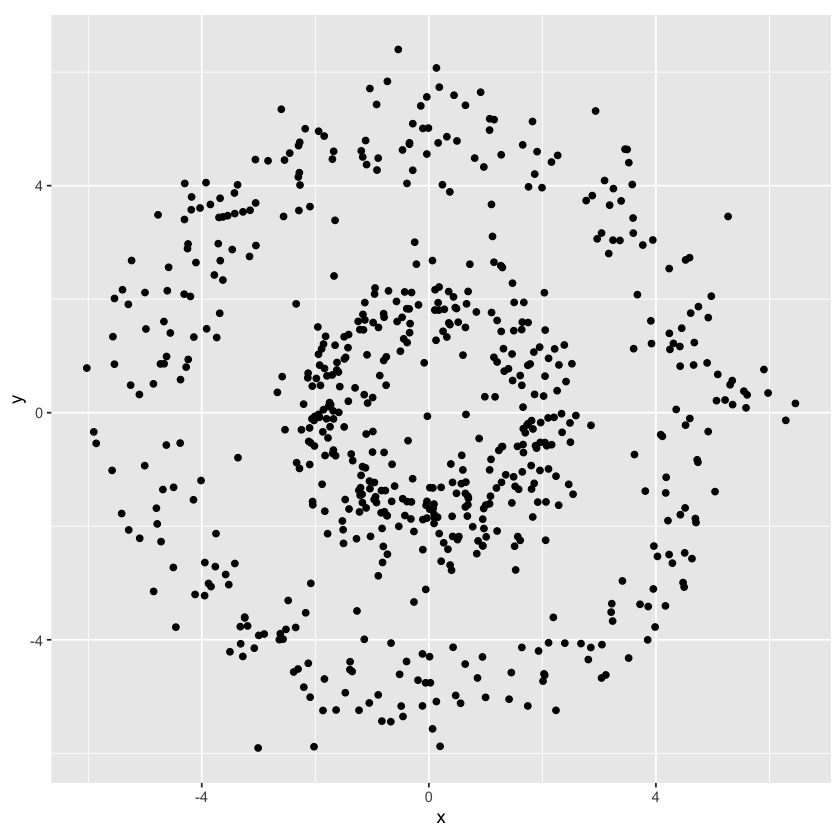

In [8]:
circular_data <- tibble(r = sample(c(2,5),size=650,replace=TRUE) + rnorm(650,0,0.5),
            theta = runif(650,0,2*pi)) %>%
    transmute(x=r*cos(theta),
              y=r*sin(theta));
ggplot(circular_data, aes(x,y)) + geom_point() + coord_fixed()

#### h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.
A vector space is a set of variables along a field that follow a mathematical structure that assumes linearity,
which means they can be added and scale them.

The manifold is the local vector space of a set. While a vector space assumes linearity, a manifold
can be non-linear but resembles the local vector space. 

In PAC, we scaled the data and placed it on a vector space by rotating individual points.
In T-SNE, it assumes the data lies on a manifold and preserves local neighborhood 
relationships to calculate the probability
that two points are neighbors.

## Question 4
#### a) Perform T-SNE
Set `seed = 123`.  
*Hint:* Subset your PCA results to PC1–PC10, add the class variable back in, remove duplicates, then perform T-SNE.

In [9]:
library(Rtsne)

wine_PCA_DF <- PCA_wine$x %>% as.data.frame() %>% select(PC1:PC10)

#adding wine class back
wine_PCA_DF$class <- wine$class

#removing duplicates
wine_PCA_no_duplicates <- wine_PCA_DF %>% filter(!duplicated(.))

str(wine_PCA_no_duplicates)

set.seed(123)

tsne_wine <- wine_PCA_no_duplicates %>% select(-class) %>% 
                  Rtsne(.,
                  dims = 2,
                  perplexity = 30,
                  verbose = FALSE,
                  check_duplicates = FALSE
                )



'data.frame':	178 obs. of  11 variables:
 $ PC1  : num  -3.31 -2.2 -2.51 -3.75 -1.01 ...
 $ PC2  : num  -1.439 0.332 -1.028 -2.749 -0.867 ...
 $ PC3  : num  -0.165 -2.021 0.98 -0.176 2.021 ...
 $ PC4  : num  -0.215 -0.291 0.723 0.566 -0.409 ...
 $ PC5  : num  -0.691 0.257 0.25 0.311 -0.298 ...
 $ PC6  : num  -0.223 -0.925 0.548 0.114 -0.405 ...
 $ PC7  : num  0.5947 0.0536 0.423 -0.3823 0.4428 ...
 $ PC8  : num  0.065 1.022 -0.343 0.642 0.416 ...
 $ PC9  : num  -0.6396 0.308 1.1745 -0.0524 -0.3259 ...
 $ PC10 : num  -1.0181 -0.1593 -0.113 -0.2387 0.0781 ...
 $ class: chr  "1" "1" "1" "1" ...


#### b) Plot the results in 2D
*Hint:* Convert your T-SNE results to a tibble and add back the class variable from your scaled data set using a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if
`.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`.”


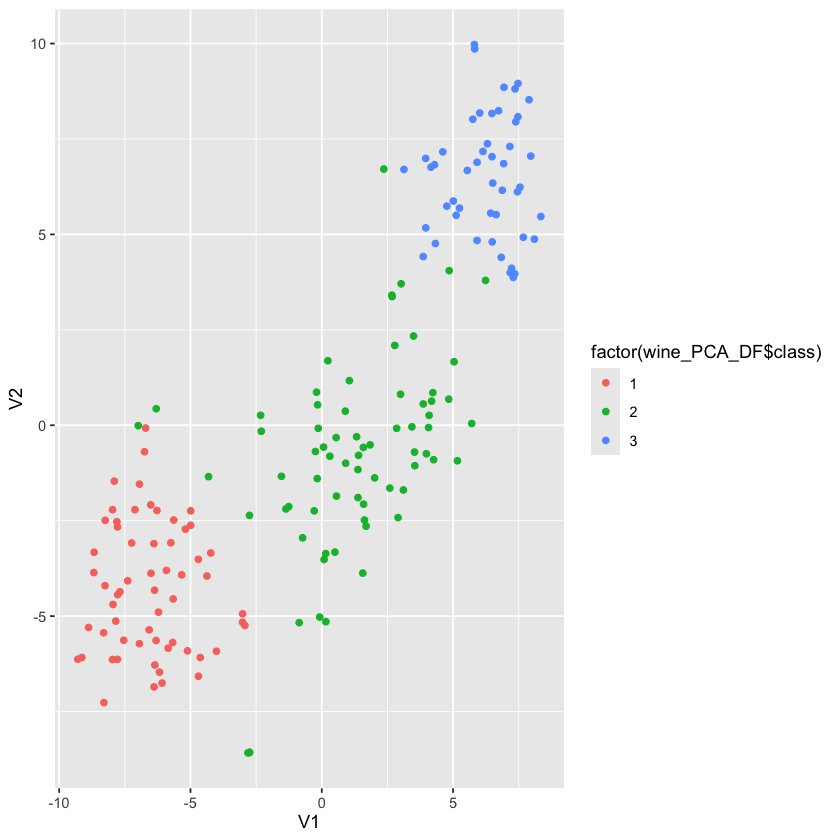

In [10]:
results <- as_tibble(tsne_wine$Y)

ggplot(results, aes(V1, V2)) + geom_point(aes(color = factor(wine_PCA_DF$class)))

#### c) Why didn't we stop at PCA?
We didn't stop at PCA because while PCA is great at reducing redundancy and dimensionality in the data, 
T-SNE is better are visualizing the complex spacial relationship of this data by
predicting the probability of two points being neighbors. This helps visualize
the similarities and differences of the wine classes in the original data.

#### d) What other types of data does this workflow make sense for?
Genomics and gene expression data would make sense
because of the complex biological relationships/clusters that exist.
Another type of data would be neural activity data because it has
high dimensionality and noisiness but could be reduced to determine clustering.

